### NLP Model For Twitter Sentiment Analysis on Google and Apple products
The goal of this project is to develop a Natural Language Processing (NLP) model that analyzes sentiment in tweets related to Google and Apple products.The dataset sourced from Kaggle, contains tweets labeles as postive, negative and Neutral

### Why Sentiment Analysis Matters
In today's digital landscape,sentiment analysis plays a vital role in understanding public perception. Companies use this method to gain insightful information form massive volumes of textual data such as social media comments,news stories and customer  evaluations. We can improve decision-making and business intelligence by implementing NLP algorithms like Suppor Vector Machines(SVM) and Naive bayes.

The main objective of this project is to :
1. Preprocess Twitter data(tokenization, cleaning and vectorization)
2. Apply machine learning models for sentiment classification
3. Asses model perofmance using important metrics

Our goal is to creae an effective sentiment analysis model by the project's conclusion that offers insightful information about consumer perception of Apple and Google products

## Summary 

### Step 1: Importing libraries

In [2]:
#Basic Python Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Natural language processing libraries
from nltk.corpus import stopwords
import string 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer,word_tokenize
import re
from nltk import FreqDist
from wordcloud import WordCloud
#scikit-learn
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report
#imbalanced-learn
from imblearn.pipeline import Pipeline  # Use imbalanced-learn's Pipeline
from imblearn.over_sampling import SMOTE

C:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Step 2: Understanding the dataset

In [98]:
#Read the data from the csv file as a dataframe and dispaly the first five rows
data = pd.read_csv('data/judge-1377884607_tweet_product_company.csv',encoding='latin-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [99]:
data.rename(columns={'tweet_text':'text',
                      'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'
                    },inplace=True)
data

,text,emotion_in_tweet_is_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [100]:
label_mapping = {
    "No emotion toward brand or product": '3',
    "Positive emotion": '5',
    "Negative emotion": '1',
    "I can't tell": 'not_relevant'}
data['sentiment'] = data['sentiment'].map(label_mapping)


For this project we will use the text column as the feature variable and sentiment column as the target variable

In [101]:
# exracting the text and sentiment column and previewing first five rows
data = data[['text','sentiment']]
data.head()

,text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,5
2,@swonderlin Can not wait for #iPad 2 also. The...,5
3,@sxsw I hope this year's festival isn't as cra...,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,5


In [102]:
#Check the number of records and features using the shape method
data.shape
print(f'This dataset contains {data.shape[0]} rows')
print(f'This dataset contains {data.shape[1]} columns')

This dataset contains 9093 rows
This dataset contains 2 columns


In [103]:
#Access information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       9092 non-null   object
 1   sentiment  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


Both our columns have non-null values, there are no missing data points  ensuring  our dataset is reasy for futher processing and model training.
The text column will need to be converted to numerics using vectorization method since our models require numerical input

In [104]:
# conforming that there are no null values
data.isna().sum()

text         1
sentiment    0
dtype: int64

In [105]:
#get summary statisctics of our data
data.describe()

,text,sentiment
count,9092,9093
unique,9065,4
top,RT @mention Marissa Mayer: Google Will Connect...,3
freq,5,5389


we see a tweet that appears 304 times we may need to drop duplicates
sentiment has 4 categories with 3 (Neutral) taking up 55.64% this created an imbalance in the dataset which we will need to handle.There is 4 sentiment values instead of the expected 3 we may need to check out the exra one

### step 3: Data cleaning

In [106]:
# check for and remove duplicates
data[data.duplicated()]

,text,sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",5
776,Google to Launch Major New Social Network Call...,3
2232,Marissa Mayer: Google Will Connect the Digital...,3
2559,Counting down the days to #sxsw plus strong Ca...,5
3950,Really enjoying the changes in Gowalla 3.0 for...,5
3962,"#SXSW is just starting, #CTIA is around the co...",5
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",5
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,3
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",3
5881,RT @mention Google to Launch Major New Social ...,3


In [107]:
#Drop the above duplicates
data.drop_duplicates(inplace=True)

<ipython-input-107-bf03dd06b0df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [108]:
#check sentiment labels
data['sentiment'].value_counts()

3               5376
5               2970
1                569
not_relevant     156
Name: sentiment, dtype: int64

In [109]:
#drop the not_relevant label
data = data.query('~(sentiment=="not_relevant")') #data = data.query('sentiment !="not_relevant"')
#confirm sentiment 'not_relevant' has been removed
data['sentiment'].value_counts()

3    5376
5    2970
1     569
Name: sentiment, dtype: int64

In [110]:
#convert sentiment column to int
data['sentiment'] = data['sentiment'].astype(int)
#confirm remova using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8915 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       8914 non-null   object
 1   sentiment  8915 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 174.1+ KB


### Step 3:Preprocess text

In [111]:
def clean_text(text):
    stopword_list = stopwords.words('english')
    stopword_list += string.punctuation
    #lemmatize
    lemmatizer = WordNetLemmatizer()
    
    text =re.sub(r"https?:[^\s]+|@[\S]+|\b\w\b|\#\w+|\.\.+", "", text)    
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.lower() not in stopword_list]
    text = [lemmatizer.lemmatize(word)for word in text]
    text = ' '.join(text)
    return text

Here we are perofming somepre-processing on the data befoe converting it into vectors and passing it to the machine learning model.

I create a function that iterates through each record,and does the following
1. using regular expression
   - we get read  of hyperlinks in the data that was showing the link where the tweet came from,
    - we also remove '@username' since the username of the person who tweeted doesnt help in rating a sentimnet 
    - Remove twitter hashtags together with the value since they do not contribute to a sentiment meaningully
    - Remove single character words
2. Remove stopwords such as 'i','me' which do not add much value and convert them to lowercase so that eg word bad and BAd are treated as the same thing
3. Lemmatize words to reduce words to their base so that word like run and running are treated as the same thing 

In [112]:
#Apply the function to the text column
data['cleaned_text'] = data['text'].astype(str).apply(clean_text)

In [113]:
### confirm data procesed
data[['text','cleaned_text']].head()

,text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,3g iphone hr tweeting dead need upgrade plugin...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipad/iphone app 'll likely apprec...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festival crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim 'reil...


### Step4: EDA

### Data Visualization of Target variables

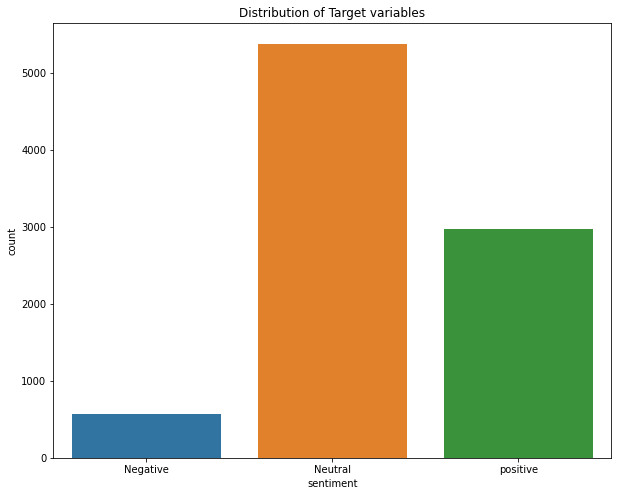

In [114]:
fig, ax = plt.subplots(figsize=(10,8))
ax= sns.countplot(data = data, x='sentiment')
ax.set(title='Distribution of Target variables',xticklabels=['Negative','Neutral','positive']);

The label data looks imbalanced where neutral takes more than 50 % of the values and postive values very less(11%)

### Check most common words in the dataset using word cloud
visualization where frequnt words appear enlarged as compared to less frequent words

#### common words for the negative sentiments

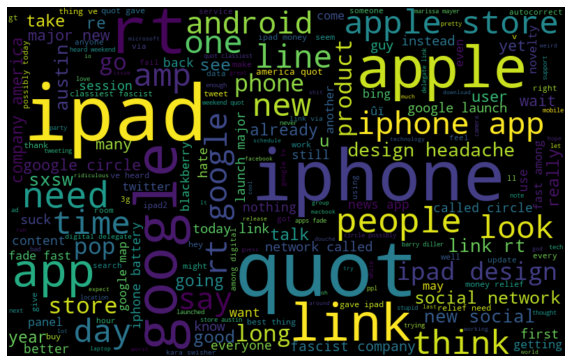

In [115]:
#Negative words
negative_words = ' '.join(data.query("sentiment==1")['cleaned_text'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

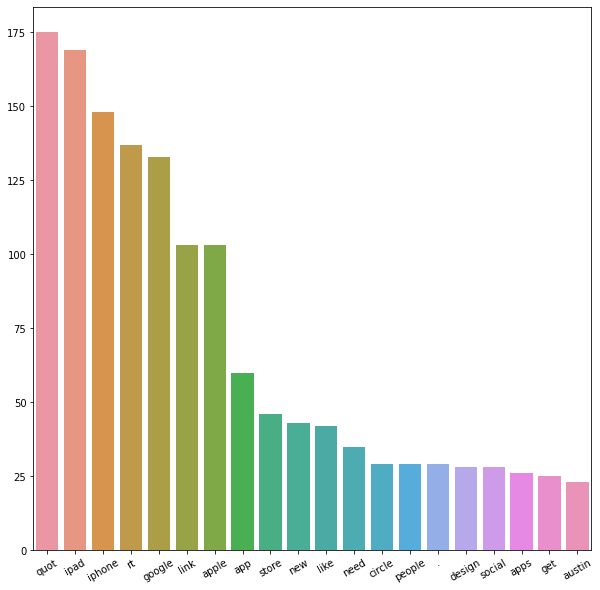

In [116]:
## Creating FreqDist for whole BoW , keeping the 20 most common tokens
negative_tokens = word_tokenize(negative_words) #tokenize data
all_fdist = FreqDist(negative_tokens).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

#### common words for the positive sentiments

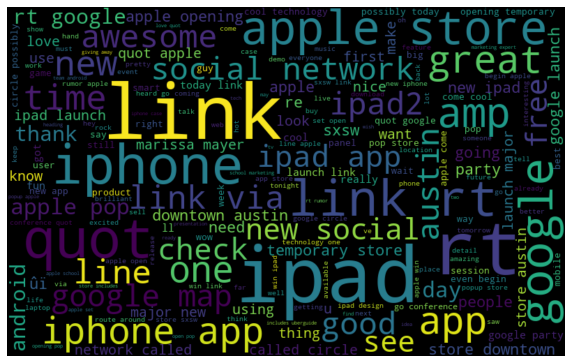

In [117]:
positive_words = ' '.join(data.query('sentiment==5')['cleaned_text'])
wordcloud = WordCloud(width=800, height=500, random_state=21 ,max_font_size=110).generate(positive_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off');

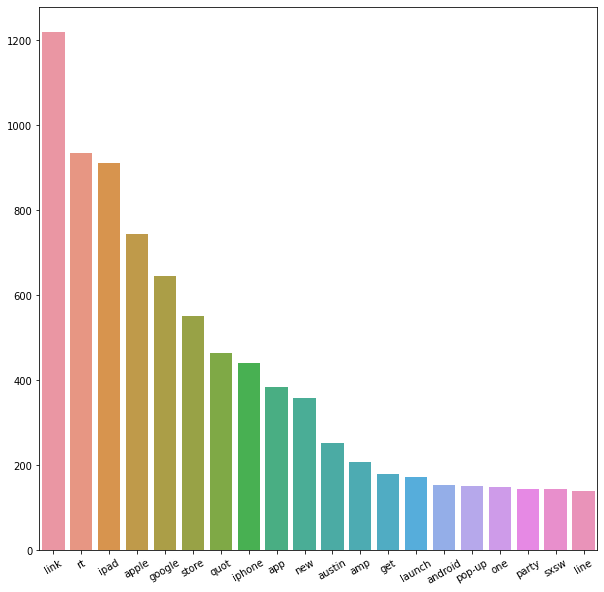

In [118]:
## Creating FreqDist for whole BoW , keeping the 20 most common tokens
positive_tokens = word_tokenize(positive_words)
all_fdist = FreqDist(positive_tokens).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

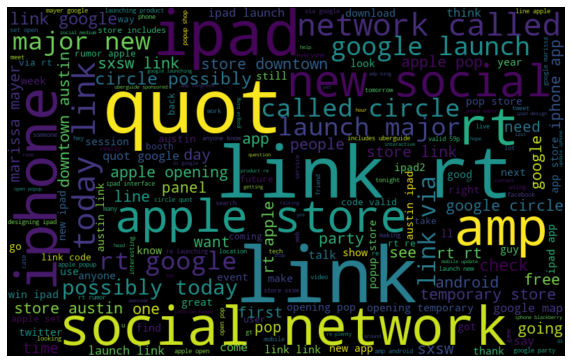

In [119]:
#neutral
neutral_words = ' '.join(data.query("sentiment==3")['cleaned_text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

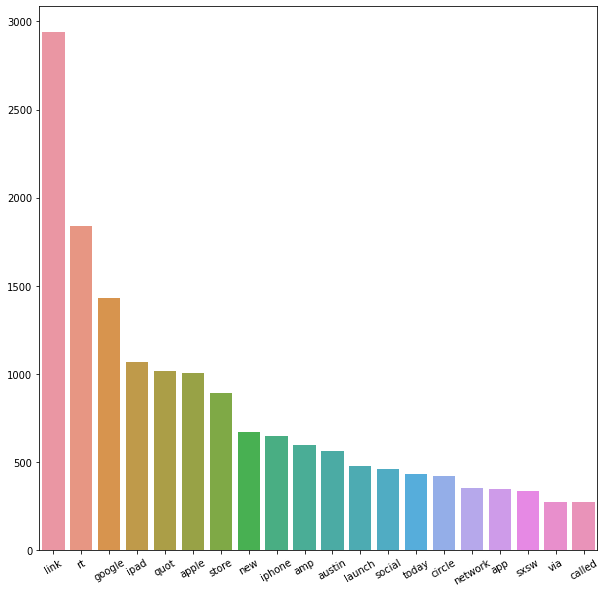

In [120]:
## Creating FreqDist for whole BoW , keeping the 20 most common tokens
neutral_tokens = word_tokenize(neutral_words)
all_fdist = FreqDist(neutral_tokens).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

### step 4: Modelling

In [121]:
#split data into x and y
X = data['cleaned_text']
y = data['sentiment']

#split data into a training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=42)

We select our feature variable as X and target variable as y. Then split our data into train and test data for modelling training and evaluation purposes

In [122]:
#create pipeline to streamline vectorization and for modelling, start with base model
#(Logistic Regression)
pipeline = Pipeline([
    ('tdif',TfidfVectorizer()),
    ('smote',SMOTE()),
    ('model',LogisticRegression())
])

Pipeline that does text vetorization i.e converting raw text into numerical features using tfidfVectorizer and suing Logistic regression to classify text

In [123]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
def modelling(pipe):
    pipe.fit(X_train,y_train)
    #predict train data
    y_hat_train = pipe.predict(X_train)
    #predict test data
    y_hat_test = pipe.predict(X_test)

    #get accuracy score
    base_train_accuracy = accuracy_score(y_train,y_hat_train)
    base_test_accuracy = accuracy_score(y_test,y_hat_test)
    report = classification_report(y_test,y_hat_test)
    accuracy = accuracy_score(y_test, y_test_predicted)
    precision = precision_score(y_test, y_test_predicted)
    recall = recall_score(y_test, y_test_predicted)

    return {
        'Training Accuracy': base_train_accuracy,
        'Test Accuracy': base_test_accuracy,
        'Classification report':report,
    }
#     print(f"Training Accuracy: {base_train_accuracy}")
#     print(f"Test Accuracy: {base_test_accuracy}")
    

To avoid repetition for varios models that we will be creating, we've defined a function that fits,predicts and calculates the accuracy_score

In [124]:
#logistic Regression evaluation
logreg = modelling(pipeline)
logreg

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'classification_report' is not defined

In [27]:
#randomForest
pipeline.set_params(model=RandomForestClassifier(random_state=42))
rdf = modelling(pipeline)
rdf

{'Training Accuracy': 0.9901146698299723, 'Test Accuracy': 0.7235387045813586}

In [ ]:
#multinomial naive bayes
pipeline.set_params(model = MultinomialNB())
nb =  modelling(pipeline)
nb

{'Training Accuracy': 0.8592328983788059, 'Test Accuracy': 0.6540284360189573}

In [29]:
#Decision tree
pipeline.set_params(model = DecisionTreeClassifier(random_state=42))
dt = modelling(pipeline)
dt

{'Training Accuracy': 0.9901146698299723, 'Test Accuracy': 0.6477093206951027}

In [30]:
#svc
pipeline.set_params(model = svm.SVC())
svm = modelling(pipeline)
svm

{'Training Accuracy': 0.9735073151443259, 'Test Accuracy': 0.7061611374407583}

In [31]:
#create a dataframe with the models accuracies
# metrics = ['Training Accuracy','Test Accuracy']
# base_scores = 

SyntaxError: invalid syntax (<ipython-input-31-e4085ff0b189>, line 3)